## 机器学习

数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

```bash
pip install numpy pandas scikit-learn
```

### 机器学习的一般框架

1. 选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
2. 划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
3. 训练模型： 使用训练数据集来拟合模型。
4. 评估模型： 使用测试数据集评估模型性能。
5. 调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
6. 预测： 使用训练好的模型进行新数据的预测。

### 以 SVM 为例

#### SVM 基本概念  

将实例的特征向量（以二维为例）映射为空间中的一些点，如下图的实心点和空心点，它们属于不同的两类。SVM 的目的就是想要画出一条线，以“最好地”区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。

支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。

SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。

![image](https://github.com/X-lab2017/OpenTEA101/assets/115639837/f85c6a50-aca5-44d9-85e0-d1a6b4b57280)

#### 选择模型(导入库)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#### 准备数据

In [ ]:
# features是特征，labels是目标变量
data = pd.read_csv('your_data.csv')
features = data.drop('target', axis=1)
labels = data['target']

#### 划分数据集

In [ ]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 训练SVM模型

In [ ]:
# 创建并训练SVM模型
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

#### 评估模型

In [ ]:
# 使用测试集进行预测
y_pred = svm_model.predict(X_test_scaled)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

### 评估指标

#### 准确度（Accuracy）

准确度是分类问题中最常用的评估指标，表示正确预测的样本比例。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/9aecc8cf-fce2-431d-bb8d-7723ffaa792f)

#### 精确度（Precision）

表示模型在预测为正类别的样本中，有多少是真正的正类别。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/f1851194-c009-4d5e-94a4-823e82a93bdd)

#### 召回率（Recall）

表示真实正类别中有多少被模型正确地预测为正类别。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/cf9a38fa-d0a7-40d1-91f4-afe807573411)

#### F1分数（F1 Score）

综合考虑了精确度和召回率，是一个平衡指标。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/273a6487-394c-46b5-a2ea-76c26954ca59)

#### 混淆矩阵（Confusion Matrix）

- 一个表格，用于描述模型的分类性能，显示实际类别与预测类别的对应关系。
- 通常包含**True Positives**、**True Negatives**、**False Positives**和**False Negatives**。

#### 代码示例

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

# 准确度
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# 精确度
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision}')

# 召回率
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall}')

# F1分数
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# 混淆矩阵
confusion_mat = confusion_matrix(y_true, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
Confusion Matrix:
[[2 0]
 [1 3]]


## K-最近邻算法

K近邻（K-Nearest Neighbors，简称KNN）算法是一种基本的分类和回归方法，也是监督学习中最简单、直观的方法之一。

该算法基于一个简单的思想：如果一个样本在特征空间中的k个最近邻居中的大多数属于某个类别，则该样本也属于这个类别。



### 主要步骤

1. 选择K值： 首先，确定K的值，即考虑的最近邻居的数量。K值的选择通常通过交叉验证来确定，过小的K值容易受到噪声的影响，而过大的K值可能忽略了样本局部的特征。
2. 计算距离： 对于给定的样本，计算它与训练集中每个样本的距离。常用的距离度量包括欧氏距离、曼哈顿距离、闵可夫斯基距离等。
3. 找到K个最近邻居： 根据计算的距离找到与样本最近的K个邻居。
4. 投票决策： 对于分类问题，统计K个最近邻居中每个类别的出现次数，选择出现最频繁的类别作为该样本的预测类别。对于回归问题，可以计算K个最近邻居的平均值作为预测输出。

### 以鸢尾花数据为例

#### 导入库和数据

In [9]:
# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征
y = iris.target  # 标签

# 使用PCA进行数据降维，以便可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### 数据展示

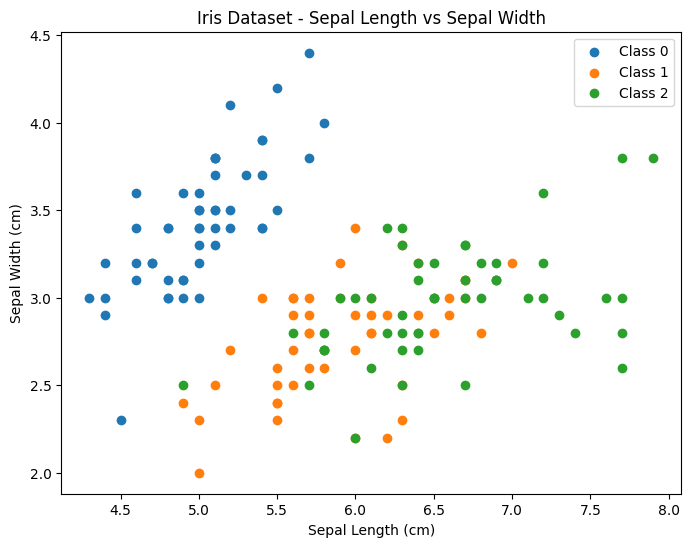

In [10]:
# 绘制散点图
plt.figure(figsize=(8, 6))

# 根据类别不同用不同颜色表示
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

# 添加标签和标题
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

#### 训练集数据

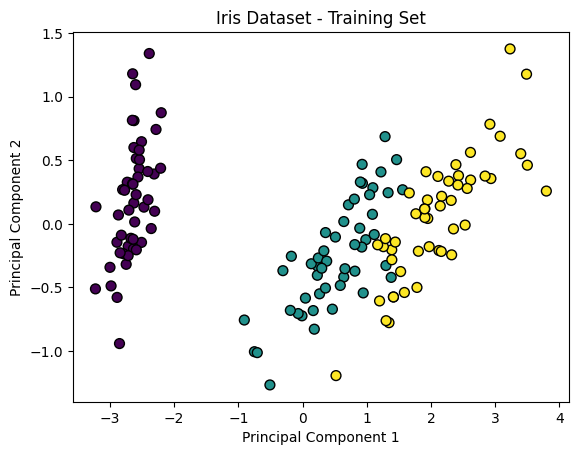

In [11]:
# 可视化训练集数据
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Iris Dataset - Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 训练模型

In [12]:
# 初始化K近邻分类器，选择K值（这里选择K=3）
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 在训练集上训练模型
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 测试模型

In [13]:
# 在测试集上进行预测
y_pred = knn_classifier.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print("分类准确率：", accuracy)

分类准确率： 1.0


#### 结果

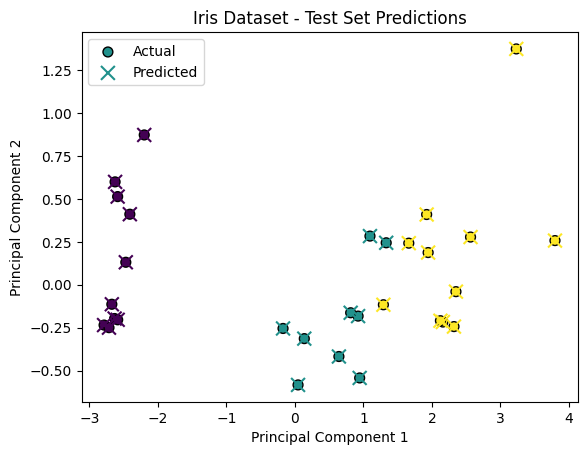

In [14]:
# 可视化测试集数据和模型预测结果
X_test_pca = pca.transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test,
            cmap='viridis', edgecolor='k', s=50, label='Actual')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred,
            cmap='viridis', marker='x', s=100, label='Predicted')
plt.title('Iris Dataset - Test Set Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 朴素贝叶斯

朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6b01a8df-b83d-48a2-a13f-9dfe60335f9e)

### 以新闻数据分类为例

#### 导入库和数据

In [15]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# 加载数据集
newsgroups = fetch_20newsgroups(subset='all')

#### 查看类别标签

In [16]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### 查看数据集的描述

In [17]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

#### 查看数据集的数据样本

In [18]:
# 打印数据集中的第一个样本（文本内容）。可以更改索引以查看其他样本。
print(newsgroups.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




#### 数据变换

In [19]:
# 将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, newsgroups.target, test_size=0.2, random_state=42)

#### 模型训练

In [20]:
# 创建朴素贝叶斯分类器
classifier = MultinomialNB()

# 在训练集上训练分类器
classifier.fit(X_train, y_train)

MultinomialNB()

#### 预测和结果

Accuracy: 0.8503978779840848
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.89      0.86       151
           comp.graphics       0.63      0.91      0.74       202
 comp.os.ms-windows.misc       0.93      0.22      0.36       195
comp.sys.ibm.pc.hardware       0.60      0.86      0.71       183
   comp.sys.mac.hardware       0.91      0.87      0.89       205
          comp.windows.x       0.84      0.83      0.84       215
            misc.forsale       0.94      0.62      0.75       193
               rec.autos       0.88      0.93      0.91       196
         rec.motorcycles       0.96      0.92      0.94       168
      rec.sport.baseball       0.98      0.96      0.97       211
        rec.sport.hockey       0.96      0.96      0.96       198
               sci.crypt       0.87      0.96      0.91       201
         sci.electronics       0.90      0.83      0.86       202
                 sci.med       0.94      0.92 

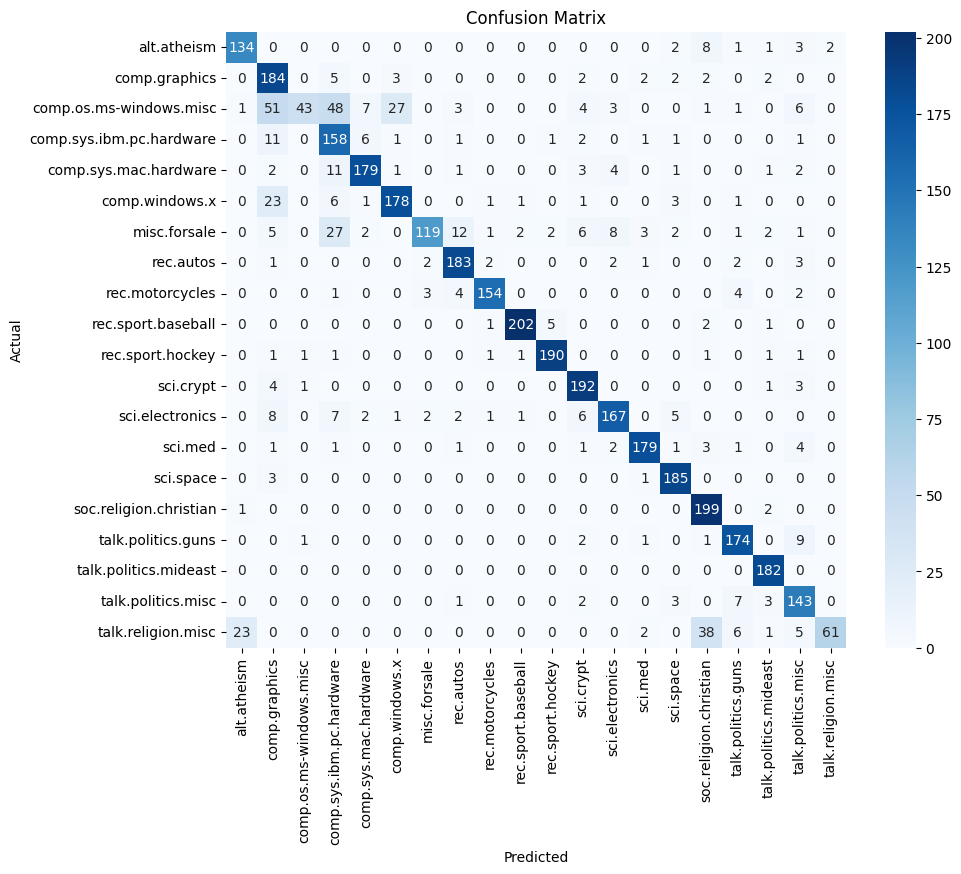

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 在测试集上进行预测
y_pred = classifier.predict(X_test)

# 评估分类器性能
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 输出更详细的性能报告
print(metrics.classification_report(
    y_test, y_pred, target_names=newsgroups.target_names))

# 画混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 聚类分析

聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。

聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

### 常见聚类方法

1. K均值聚类（K-Means Clustering）： K均值是最常见和最简单的聚类算法之一。它将数据集划分为K个簇，每个簇的中心由该簇中所有样本的平均值计算得到。算法迭代更新簇中心，直到收敛。
2. 层次聚类（Hierarchical Clustering）： 层次聚类构建一棵树状结构，其中每个节点代表一个簇。通过递归地将最相似的簇合并（凝聚层次聚类）或分裂（分裂层次聚类），直到整个数据集被聚为一个簇。

### 图像聚类

图像处理需要安装的库

```bash
pip install pillow opencv-python
```

#### 导入库和数据

In [22]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# 读取图像
image_path = "lena.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 转换颜色通道顺序

#### 图像显示

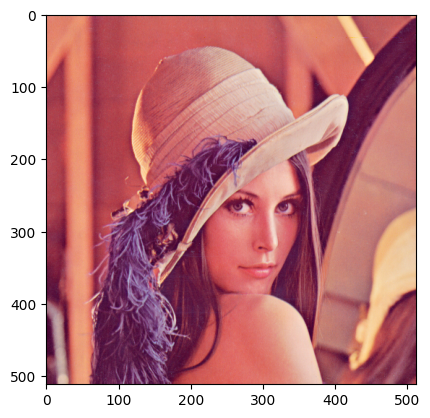

In [23]:
# 显示原始图像
plt.imshow(image)

#### 数据处理

In [24]:
# 将图像转为一维数组
original_shape = image.shape
image_array = image.reshape((-1, 3))

# 对颜色进行标准化
image_array = np.array(image_array, dtype=float) / 255.0

# 打乱数据
image_array_sample = shuffle(image_array, random_state=0)[:1000]

#### 聚类

In [25]:
# 使用K均值聚类
kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(image_array_sample)

# 将聚类结果应用到整个图像
segmented_image = kmeans.cluster_centers_[kmeans.predict(image_array)]

# 将一维数组转为图像形状
segmented_image = segmented_image.reshape(original_shape)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### 聚类结果

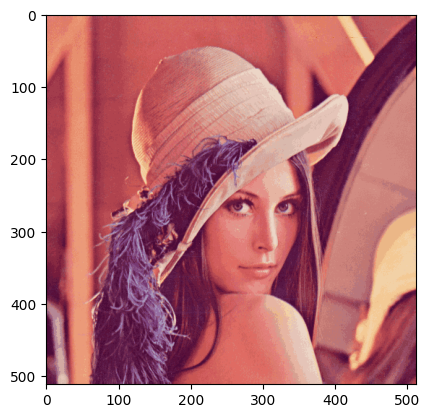

In [26]:
# 显示聚类后的图像
plt.imshow(segmented_image)

### 鸢尾花聚类

#### 导入数据集和聚类库

In [27]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载鸢尾花数据集
iris = load_iris()
data = iris.data
target = iris.target

#### 使用k-means聚类

In [28]:
# 使用K均值聚类
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

#### 降维

In [29]:
# 降维到2维空间以便可视化
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

#### 结果可视化

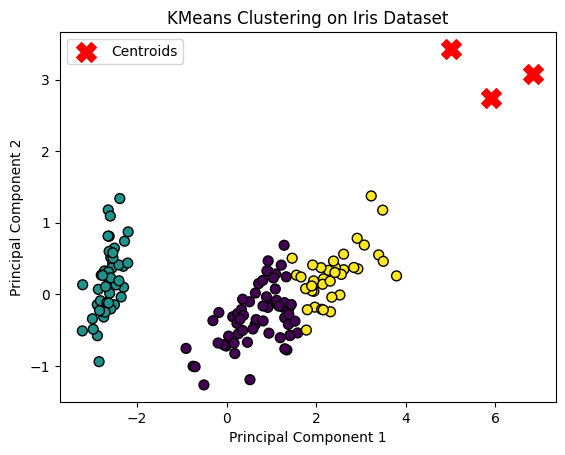

In [30]:
# 将聚类结果可视化
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_,
            cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### 先降维后聚类的形式

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


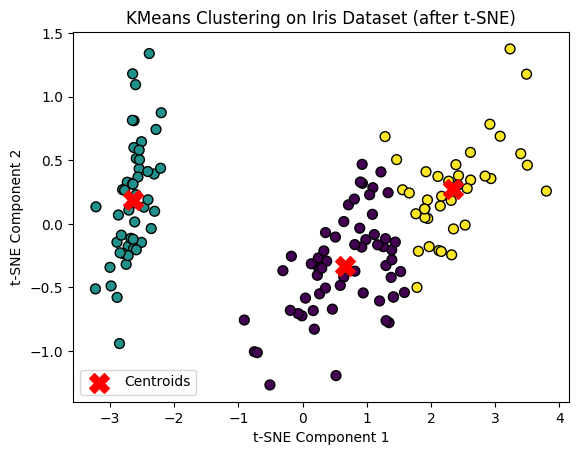

In [31]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
data = iris.data
target = iris.target

# 使用PCA进行降维
pca = PCA(n_components=2, random_state=0)
data_2d = pca.fit_transform(data)

# 使用K均值聚类
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_2d)

# 将聚类结果可视化
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_,
            cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering on Iris Dataset (after t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

#### 使用轮廓系数评估

轮廓系数（Silhouette Coefficient）是一种用于度量数据点与其自身簇内数据的相似度与与最近的相邻簇的数据点的不相似度的指标。

1. 对于每个样本，计算它与同簇内所有其他点的平均距离（称为簇内平均距离，a）。

2. 对于每个样本，计算它与最近的不同簇内所有点的平均距离（称为簇间平均距离，b）。

3. 计算轮廓系数（S）：

​![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6f26e49d-f738-4f41-998b-75e4870829f2)


轮廓系数的取值范围在[-1, 1]之间：

- 如果 S 接近1，表示样本与自身簇内的其他样本相似度高，与其他簇内的样本不相似，聚类效果好。
- 如果 S 接近-1，表示样本与自身簇内的其他样本相似度低，与其他簇内的样本相似度高，聚类效果差。

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

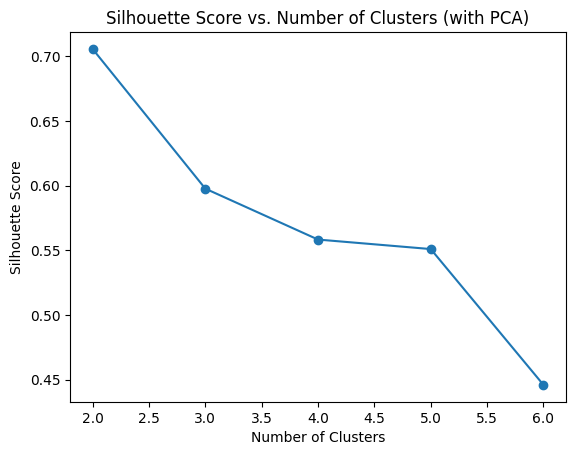

In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
data = iris.data

# 使用PCA进行降维
pca = PCA(n_components=2, random_state=0)
data_2d = pca.fit_transform(data)

# 选择不同的聚类数，计算轮廓系数
n_clusters_list = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(data_2d)
    silhouette_avg = silhouette_score(data_2d, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数与聚类数的关系图
plt.plot(n_clusters_list, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (with PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()